# **Starbucks Consumer Reviews Dataset**

```
This dataset offers a comprehensive collection of consumer reviews and ratings for Starbucks, a renowned coffeehouse chain.
The data was meticulously collected through web scraping from multiple pages on the ConsumerAffairs website,
providing valuable insights into customer sentiment  and feedback about Starbucks locations.
```

### _Content_

- **Name**: The reviewer's name, if available.
- **Location**: The location or city associated with the reviewer, if provided.
- **Date**: The date when the review was posted.
- **Rating**: The star rating given by the reviewer, ranging from 1 to 5.
- **Review**: The textual content of the review, capturing the reviewer's experience and opinions.
- **Image Links**: Links to images associated with the reviews, if available.

### _Use Cases_

1. **Sentiment Analysis**: Researchers and data analysts can leverage this dataset to perform sentiment analysis, gaining insights into customer sentiment towards Starbucks.
   
2. **Consumer Insights**: Businesses can extract valuable insights into customer preferences and areas for improvement based on the reviews and ratings provided.
   
3. **Natural Language Processing (NLP)**: NLP practitioners can utilize the textual reviews for various NLP tasks, such as text classification, summarization, and topic modeling.

### _Source_

The data was collected by web scraping customer reviews and ratings from the ConsumerAffairs website. Please note that this dataset is intended for research and analysis purposes and may be subject to the terms and conditions specified by ConsumerAffairs.


# **Import Libraries & Data Loading**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re # if u want to learn regex [https://regex101.com/]
import string
import random # Random number generators - Library for generating random numbers, selecting random elements, shuffling sequences, etc.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)

In [2]:
import nltk # Natural Language Toolkit - Library for natural language processing (NLP) tasks such as tokenization, stemming, tagging, parsing, and more.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm # A Fast, Extensible Progress Bar - Library for creating progress bars to monitor the progress of iterations or tasks.
from nltk.stem import WordNetLemmatizer, PorterStemmer

from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, GlobalMaxPool1D, BatchNormalization, Dropout, GRU, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

import keras
from keras.initializers import Constant
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, # Precision score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total predicted positives.
    recall_score, # Recall score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total actual positives.
    f1_score, # F1 score - Harmonic mean of precision and recall, a metric for evaluating classification models.
    classification_report, # Classification report - Summary of the precision, recall, F1 score, and support for each class in a classification problem.
    accuracy_score # Accuracy score - Metric for evaluating classification models, measuring the proportion of correct predictions to the total number of predictions.
)

In [3]:
nltk.download(['stopwords', 'punkt', 'wordnet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
def check_duplicates(dataframe):
    print("Duplicate Values (Top 10):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Number of Duplicate Rows: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    print("Data Preview:")
    print("---------------------------")
    display(dataframe.head())

    print("\nGeneral Info:")
    print("---------------------------")
    print(dataframe.info())

    print("\nDescriptive Statistics:")
    print("---------------------------")
    display(dataframe.describe().T)

kaggle datasets download -d harshalhonde/starbucks-reviews-dataset

In [5]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/5. Project [Data Bridge]/NLP for Starbucks Reviews Dataset"

In [6]:
df = pd.read_csv(mainPath + "/Data/reviews_data.csv")

# **Simple explore the data**

In [7]:
check_duplicates(df)

Duplicate Values (Top 10):
Number of Duplicate Rows: 1


,name,location,Date,Rating,Review,Image_Links
819,Nikki,"Union City, CA","Reviewed Nov. 5, 2008",NaN,No Review Text,['No Images']


In [8]:
missing_data(df)

,Total,Percent
Rating,145,17.058824
name,0,0.000000
location,0,0.000000
Date,0,0.000000
Review,0,0.000000
Image_Links,0,0.000000


In [9]:
basic_data_info(df)

Data Preview:
---------------------------


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...



General Info:
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB
None

Descriptive Statistics:
---------------------------


,count,mean,std,min,25%,50%,75%,max
Rating,705.0,1.870922,1.397672,1.0,1.0,1.0,2.0,5.0


>From the simple exploration that we did, the conclusion was that there was duplicate data but only 1 record, and the missing value in the `Rating` column was 17%, meaning 145 records out of the total data of 850 records/rows.

# **v. Feature Engineering**

> > ### ***Preprocessing Data***
---

In [10]:
# drop duplicate entries considering all columns
df = df.drop_duplicates()

In [11]:
# Now we know, that Image Link column is Useless
count = df["Image_Links"].value_counts().get("['No Images']", 0)
print("Count of '{}' in 'Image_Links' column: {}".format("No Images", count))

df.drop(columns = "Image_Links", inplace = True) # Drop column here

Count of 'No Images' in 'Image_Links' column: 803


In [12]:
def show_nulls_data(df, column_name):
    null_values = df[df[column_name].isnull()]
    print("Null values based on column '{}' :\n".format(column_name))
    return null_values

In [13]:
show_nulls_data(df, "Rating")

Null values based on column 'Rating' :



,name,location,Date,Rating,Review
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar..."
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ..."
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium..."
...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text


> We have a new problem, but a simple one. review values in `Review` column contain useless values like "No Review Text" so we should check those values and of course discard them.

In [14]:
# df[(df['Review'] == 'No Review Text') & (pd.isna(df['Rating']))]
df[df.Review == "No Review Text"].head()

,name,location,Date,Rating,Review
62,Sharon,"Culpeper, VA","Reviewed July 18, 2022",2.0,No Review Text
100,Donald,"Orlando, FL","Reviewed Nov. 22, 2021",1.0,No Review Text
793,Maureen,"Lakewood, WA","Reviewed March 25, 2009",NaN,No Review Text
794,Maryellen,"Richmond, TX","Reviewed March 23, 2009",NaN,No Review Text
795,Ben,"Shanghai, OTHER","Reviewed March 23, 2009",NaN,No Review Text


In [15]:
count_of_all = (df[df.Review == "No Review Text"].shape)[0]
count_of_nan = (df[(df['Review'] == 'No Review Text') & (pd.isna(df['Rating']))].shape)[0]

print(f"So here we can conclude that the value 'No Review Text' appears in the data {count_of_all} times, and among those, there are {count_of_nan} rows with NaN ratings.")

So here we can conclude that the value 'No Review Text' appears in the data 36 times, and among those, there are 34 rows with NaN ratings.


Since our goal is to analyze text and perform sentiment analysis, we will focus on cleaning the `Review` column rather than others.

In [16]:
# Drop rows with the `No Review Text` value in the 'Review' column
df = df.drop(df[df['Review'] == "No Review Text"].index)

In [17]:
# Drop all missing value in Dataframe
df = df.dropna(axis = 0, how ='any')

> `In conclusion, up to this step`, the data has been cleaned from missing values and also useless values such as "No Review Text" have been removed. Initially, there were `850 rows` before preprocessing, and after cleaning, it reduced to `703 rows`. It's quite crucial, but manageable.

> > ### ***Define the label***
---

As usual, for sentiment analysis, we need labels in the form of ordinal data such as `Positive`, `Neutral`, `Negative` as targets to be trained into the ANN model later on. There are several methods that will be applied and the best result will be chosen.

Currently, we aim to categorize our data into three different categories: Positive, Negative, and Neutral, with:

```python
Neutral = 0
Positive = 1
Negative = 2
```

This categorization helps the model in its classification task, especially in distinguishing whether the customer is satisfied with the service or not.

In [18]:
df['label based on Rating'] = df['Rating'].replace([1, 2], 2)
df['label based on Rating'] = df['label based on Rating'].replace(3, 0)
df['label based on Rating'] = df['label based on Rating'].replace([4, 5], 1)

# Converting 'Rating' column to integer type
df['label based on Rating'] = df['label based on Rating'].astype(int)

In [19]:
df['label based on Rating']

0      1
1      1
2      1
3      1
4      1
      ..
700    2
701    0
702    2
703    2
749    1
Name: label based on Rating, Length: 703, dtype: int64

Used Transformers Pre-trained model for labeling the corpus

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

In [20]:
# import transformers
# print("Transformers version:", transformers.__version__)
# from transformers import pipeline

# sentiment_task  = pipeline(
#     model="cardiffnlp/twitter-roberta-base-sentiment-latest",
#     return_all_scores=True
# )

In [21]:
def predict_sentiment(df):
    # Create empty lists to store results
    id_sentiments = []
    id_scores = []

    # Iterate over each row in the dataframe
    for index, row in df.iterrows():
        # Predict sentiment for id_full_text
        id_result = sentiment_task(row['Review'])
        result = id_result[0]
        # Find the index of the highest score
        max_score_index = max(range(len(result)), key=lambda i: result[i]['score'])

        # Extract the label and highest score
        max_label = result[max_score_index]['label']
        max_score = result[max_score_index]['score']

        id_sentiments.append(max_label)
        id_scores.append(max_score)

    # Add sentiment and score columns to the dataframe
    df['label based on roBERTa Model'] = id_sentiments
    df['sentiment score based on roBERTa Model'] = id_scores

    return df

In [22]:
# df = predict_sentiment(df)
# df.to_csv(mainPath + "/Data/reviews_data_with_label.csv")

In [23]:
df = pd.read_csv(mainPath + "/Data/reviews_data_with_label.csv").drop(columns = 'Unnamed: 0')

In [24]:
df['label based on roBERTa Model'] = df['label based on roBERTa Model'].replace({'neutral': 0, 'positive': 1, 'negative': 2})

In [25]:
df['label based on Rating'].value_counts()

label based on Rating
2    548
1    122
0     33
Name: count, dtype: int64

In [26]:
df['label based on roBERTa Model'].value_counts()

label based on roBERTa Model
2    422
1    152
0    129
Name: count, dtype: int64

> Here we've created a sentiment analysis label to be used in model training, utilizing two methods. The first method involves converting the `Rating` column into Positive, Neutral, Negative categories. The other method is to use a HuggingFace pre-trained model. However, based on manual inspection, it appears that converting `Rating` into sentiment categories is more suitable. So, we'll proceed with that.

In [27]:
df.head(2)

,name,location,Date,Rating,Review,label based on Rating,label based on roBERTa Model,sentiment score based on roBERTa Model
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,1,1,0.974351
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,1,1,0.937910


In [28]:
df_used = df[['Review', 'label based on Rating']].rename(columns={'label based on Rating': 'label'})

> > ### ***Clean the Corpus***
---

> We'll eliminate punctuation, stopwords, numbers, and alphanumeric characters from our text to ensure that our model doesn't consider them during training. Stopwords are common words like "and," "the," or "is," which are often removed during natural language processing tasks to focus on more meaningful words. These words are typically deemed to have little value in discerning the content or significance of a document.

In [29]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [30]:
# Define the preprocessing function
def text_preprocessing(text_series):
    # Lowercasing
    text_series = text_series.apply(lambda x: x.lower())
    # Remove non-alphanumeric characters
    text_series = text_series.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    # Tokenize the text
    text_series = text_series.apply(lambda x: word_tokenize(x))
    # Lemmatize and stem the tokens
    text_series = text_series.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
    text_series = text_series.apply(lambda tokens: [stemmer.stem(word) for word in tokens])
    # Remove stopwords
    text_series = text_series.apply(lambda tokens: [word for word in tokens if word not in stop_words])
    return text_series.apply(lambda tokens: ' '.join(tokens))

In [31]:
from sklearn.pipeline import Pipeline

# Create a FunctionTransformer for the text_preprocessing function
preprocessor = FunctionTransformer(text_preprocessing)

# Create a pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor)
])

In [32]:
# df_used['Review_clean'] = df_used['Review'].apply(lambda x: text_preprocessing(x))

In [33]:
df_used['Review_clean'] = pipeline.fit_transform(df_used['Review'])

In [34]:
df_used.columns

Index(['Review', 'label', 'Review_clean'], dtype='object')

In [35]:
def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=set(stop_words),
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

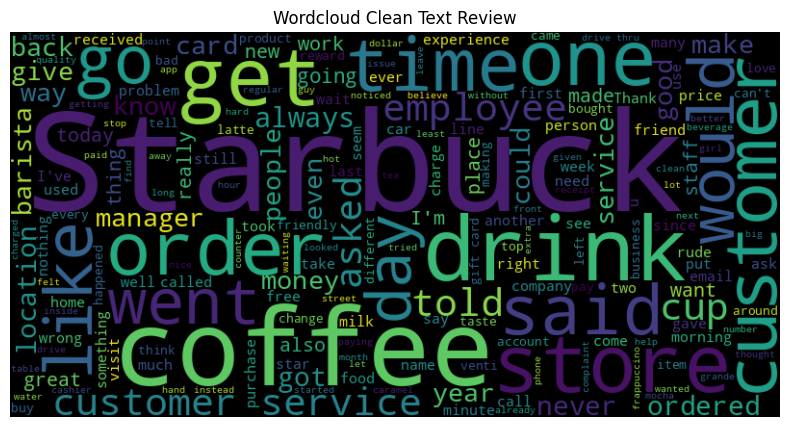

In [36]:
generate_wordcloud(df['Review'], "Wordcloud Clean Text Review")

> > ### ***Splitting Data***
---

In [37]:
# Data Splitting into Train, Test, Val Dataset

'''
Train set: 75% of initial data (X_train, y_train)
Validation set: 10% of initial data (X_val, y_val)
Test set: 15% of initial data (X_test, y_test)
'''

# Reset indeks semua data
X_train_val, X_test, y_train_val, y_test = train_test_split(df_used.Review_clean,
                                                    df_used.label,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=df_used.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (477,)
Val Size   :  (120,)
Test Size  :  (106,)


Divide data into train, test, validation data.
1. First, the data is split into `X_train_val` and `y_train_val` using train_test_split with a `test size` of `15%`.
2. Then, `X_train_val` and `y_train_val` are subdivided into `X_train`, `X_val`, `y_train`, and `y_val` using train_test_split with a `val size` of `10%` of `X_train_val`.
3. The remaining `15%` of the initial data is used as a `test set`(`X_test` and `y_test`).

In [38]:
# Define the one-hot encoding function
def one_hot_encoding(y):
    return to_categorical(y)

In [39]:
ohe_transformer = FunctionTransformer(one_hot_encoding)

In [40]:
pipeline = Pipeline([
    ('one_hot_encoding', ohe_transformer)
])

In [41]:
# Change Target to One Hot Encoding
from tensorflow.keras.utils import to_categorical

# Transforming y_train, y_val, and y_test using the pipeline
y_train_ohe = pipeline.fit_transform(y_train)
y_val_ohe = pipeline.transform(y_val)
y_test_ohe = pipeline.transform(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [42]:
X_train.shape

(477,)

In [43]:
y_train_ohe.shape

(477, 3)

> > ### ***Vectorization***
---

1. `stop_words='english'`: This parameter indicates that stopwords in English will be ignored. Stopwords are common words that appear frequently in text and do not provide much information about the content of the text.

2. `ngram_range=(1,2)`: This parameter specifies the range of n-grams to use. In this case, the n-grams used are unigrams (n=1) and bigrams (n=2). A unigram is a collection of one word, while a bigram is a collection of two adjacent words.

3. `min_df=0.1`: This parameter specifies the minimum number of documents in which a word must appear to be included in the vector. A value of 0.1 indicates that words that appear in at least 10% of all documents are included.

4. `max_df=0.7`: This parameter determines the maximum number of documents in which a word is still considered common and not considered a significant feature. A value of 0.7 indicates that words that appear in more than 70% of all documents will be ignored.

5. `max_features=100`: This parameter specifies the maximum number of features to use. In this case, only the top 100 features will be selected based on their frequency.

By setting these parameters, `CountVectorizer` will produce a vector representation of the text that has been converted into a bag-of-words with the specified features. These features can then be used as input for an NLP model

In [44]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.8, max_features=500)

In [45]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, max_features=500, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [46]:
print(vect.vocabulary_)

{'starbuck': 32, 'wait': 41, 'make': 21, 'coffe': 4, 'custom': 6, 'store': 33, 'dont': 10, 'wa': 40, 'thi': 34, 'day': 8, 'peopl': 27, 'order': 26, 'time': 35, 'card': 3, 'drink': 11, 'got': 15, 'told': 36, 'alway': 0, 'place': 28, 'servic': 31, 'good': 14, 'didnt': 9, 'went': 44, 'want': 42, 'im': 17, 'everi': 13, 'year': 46, 'like': 19, 'ask': 1, 'manag': 22, 'employe': 12, 'say': 30, 'use': 38, 'way': 43, 'work': 45, 'cup': 5, 'need': 24, 'custom servic': 7, 'veri': 39, 'locat': 20, 'ha': 16, 'know': 18, 'said': 29, 'money': 23, 'becaus': 2, 'onli': 25, 'tri': 37}


In [47]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm_CV = vect.transform(X_train)
x_test_dtm_CV = vect.transform(X_test)
x_val_dtm_CV = vect.transform(X_val)

In [48]:
x_train_dtm_CV.toarray().shape

(477, 47)

In [49]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(vect.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  47
Maximum Sentence Length :  118 tokens


> > ### ***TF-IDF***
---

highlighted an important point here. The use of TfidfTransformer is typically recommended when you already have a term frequency (TF) matrix from CountVectorizer or TfidfVectorizer beforehand, and you want to transform it into a term frequency-inverse document frequency (TF-IDF) matrix.

In [50]:
# Inisialisasi TfidfTransformer dan menghitung TF-IDF
tfidf_transformer = TfidfTransformer()

x_train_dtm_TFIDF = tfidf_transformer.fit_transform(x_train_dtm_CV)
x_test_dtm_TFIDF = tfidf_transformer.fit_transform(x_test_dtm_CV)
x_val_dtm_TFIDF = tfidf_transformer.fit_transform(x_val_dtm_CV)

# Hasil matriks TF-IDF
print(x_train_dtm_TFIDF.toarray().shape)

(477, 47)


## vi. ANN Training (Sequential API/Functional API)

### vi.1.Model Definition

In [51]:
embedding_dim = 100

In [52]:
x_train_dtm_TFIDF.toarray().shape

(477, 47)

In [53]:
from keras.layers import SpatialDropout1D

# Inisialisasi model
model = Sequential()
# Tambahkan lapisan Embedding
model.add(Embedding(input_dim=total_vocab, output_dim=embedding_dim))
model.add(LSTM(150, return_sequences=True))
# Tambahkan lapisan SpatialDropout1D
model.add(SpatialDropout1D(0.2))
# Tambahkan lapisan LSTM
model.add(LSTM(250, dropout=0.2, recurrent_dropout=0.4))
# Tambahkan lapisan Dense
model.add(Dense(525, activation='relu'))
# Tambahkan lapisan Dense sebagai output
model.add(Dense(3, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         4700      
                                                                 
 lstm (LSTM)                 (None, None, 150)         150600    
                                                                 
 spatial_dropout1d (Spatial  (None, None, 150)         0         
 Dropout1D)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 250)               401000    
                                                                 
 dense (Dense)               (None, 525)               131775    
                                                                 
 dense_1 (Dense)             (None, 3)                 1578      
                                                        

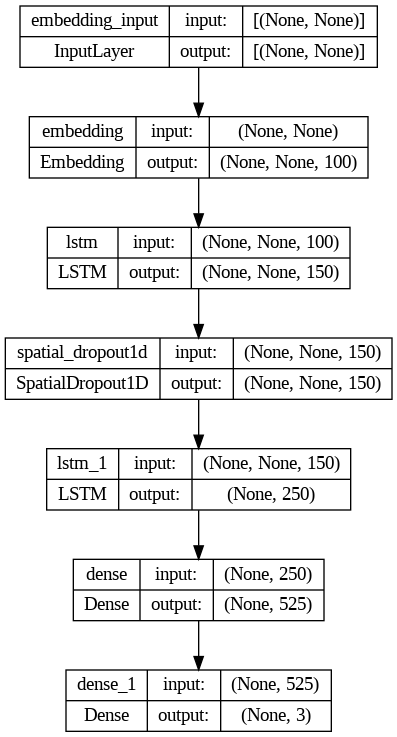

In [55]:
from tensorflow.keras.utils import plot_model

# Visualisasi arsitektur model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

### vi.2. Model Training

In [56]:
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.2,
    verbose = 1,
    patience = 3,
    min_lr = 0.00001
)

# Tentukan kondisi EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_accuracy',  # Monitor akurasi pada data validasi
    patience = 15,  # Toleransi untuk tidak ada peningkatan
    restore_best_weights = True,  # Kembalikan bobot terbaik ketika berhenti
    verbose = 1
)

In [57]:
# Latih model
import time
start_time = time.time() # Measure training time

history = model.fit(x_train_dtm_TFIDF.toarray(),
                    y_train_ohe,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val_dtm_TFIDF.toarray(), y_val_ohe),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr, checkpoint])

duration = time.time() - start_time
minutes = duration / 60
hours = duration / 3600

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 0.9982 - accuracy: 0.6226
Epoch 1: val_accuracy improved from -inf to 0.77500, saving model to model.h5
4/4 [==============================] - 23s 2s/step - loss: 0.9982 - accuracy: 0.6226 - val_loss: 0.6814 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - ETA: 0s - loss: 0.6635 - accuracy: 0.7799
Epoch 2: val_accuracy did not improve from 0.77500
4/4 [==============================] - 3s 817ms/step - loss: 0.6635 - accuracy: 0.7799 - val_loss: 0.7117 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.7799
Epoch 3: val_accuracy did not improve from 0.77500
4/4 [==============================] - 4s 1s/step - loss: 0.6904 - accuracy: 0.7799 - val_loss: 0.6609 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.7799
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: val_accuracy did not improve from 0.77500
4/4 [==============================] - 7s 2s/step - loss: 0.6620 - accuracy: 0.7799 - val_loss: 0.6573 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 5/10
4/4 [==============================] - ETA: 0s - loss: 0.6471 - accuracy:

In [58]:
print(f"--- Waktu training adalah {duration} detik ---")
print(f"--- Waktu training adalah {minutes} menit ---")
print(f"--- Waktu training adalah {hours} jam ---")

--- Waktu training adalah 96.44755840301514 detik ---
--- Waktu training adalah 1.607459306716919 menit ---
--- Waktu training adalah 0.026790988445281983 jam ---


### vi.3. Model Evaluation

In [59]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(x_test_dtm_TFIDF.toarray(), y_test_ohe)

print('Test Accuracy:', test_accuracy)

4/4 [==============================] - 0s 85ms/step - loss: 0.6371 - accuracy: 0.7830
Test Accuracy: 0.7830188870429993


In [60]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('Epoch ',fontsize=16)
        ax[idx].set_ylabel('Acc or lost',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

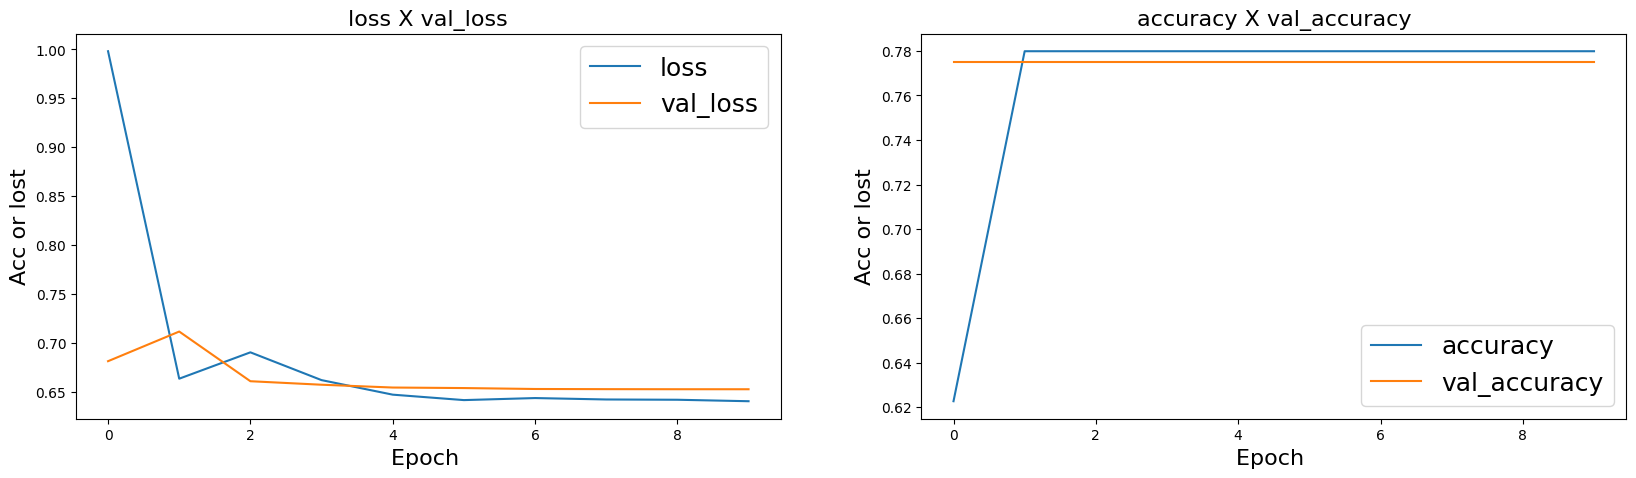

In [61]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lakukan prediksi menggunakan model
y_pred = np.argmax(model.predict(x_test_dtm_TFIDF.toarray()), axis=-1)

4/4 [==============================] - 1s 77ms/step


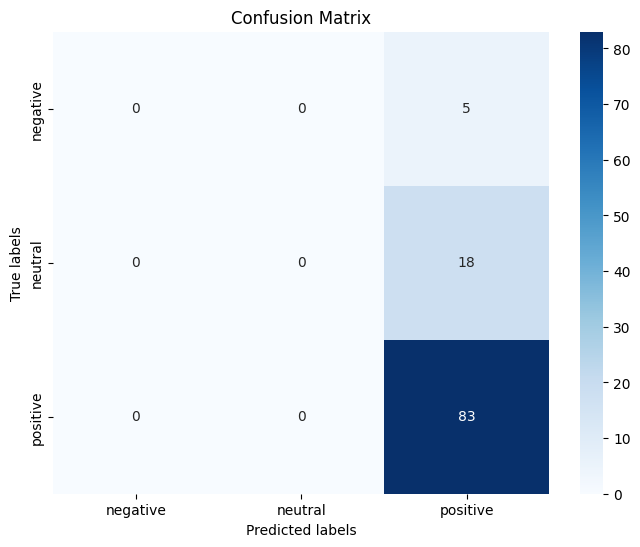

In [63]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_ohe, axis=1), y_pred)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung accuracy
accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), y_pred)

# Menghitung precision
precision = precision_score(np.argmax(y_test_ohe, axis=1), y_pred, average='weighted')

# Menghitung recall
recall = recall_score(np.argmax(y_test_ohe, axis=1), y_pred, average='weighted')

# Menghitung F1-score
f1 = f1_score(np.argmax(y_test_ohe, axis=1), y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7830188679245284
Precision: 0.61311854752581
Recall: 0.7830188679245284
F1 Score: 0.6877308575421783


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## vii. ANN Improvement (Sequential API/ Functioanl API)

In [65]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [66]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(vect.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  47
Maximum Sentence Length :  118 tokens


In [67]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

Cause: Unable to locate the source code of <function PreprocessingLayer.make_adapt_function.<locals>.adapt_step at 0x7a5eff7c68c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function PreprocessingLayer.make_adapt_function.<locals>.adapt_step at 0x7a5eff7c68c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [68]:
# Embedding

from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

### vIi.1.Model Definition

In [69]:
# !pip install tensorflow tensorflow-hub

In [70]:
# Model Training using LSTM
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(text_vectorization)
model_lstm_2.add(embedding)
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(3, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

CPU times: user 1.64 s, sys: 13.8 ms, total: 1.65 s
Wall time: 2.05 s


In [71]:
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 118)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 118, 128)          6016      
                                                                 
 bidirectional (Bidirection  (None, 118, 64)           41216     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 118, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                        

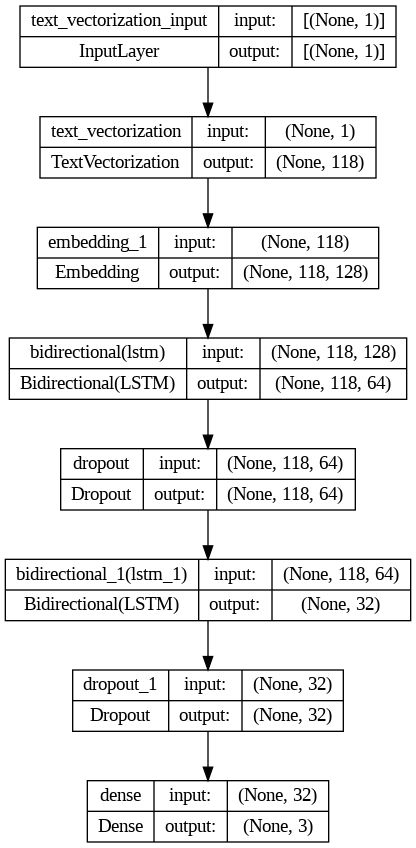

In [72]:
plot_model(model_lstm_2, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

### vii.2. Model Training

In [73]:
# Latih model
import time
start_time = time.time() # Measure training time

model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=100, validation_data=(X_val, y_val_ohe), verbose=1,
                    callbacks=[reduce_lr])

duration = time.time() - start_time
minutes = duration / 60
hours = duration / 3600

Epoch 1/100
15/15 [==============================] - 18s 702ms/step - loss: 0.8484 - accuracy: 0.7589 - val_loss: 0.6650 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 2/100
15/15 [==============================] - 5s 327ms/step - loss: 0.6588 - accuracy: 0.7799 - val_loss: 0.6409 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 3/100
15/15 [==============================] - 6s 434ms/step - loss: 0.6138 - accuracy: 0.7799 - val_loss: 0.5789 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.5853 - accuracy: 0.7799
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
15/15 [==============================] - 5s 338ms/step - loss: 0.5853 - accuracy: 0.7799 - val_loss: 0.5558 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 5/100
15/15 [==============================] - 6s 427ms/step - loss: 0.5714 - accuracy: 0.7841 - val_loss: 0.5431 - val_accuracy: 0.7750 - lr: 2.0000e-04
Epoch 6/100
15/15 [==============================] - 7s

In [74]:
print(f"--- Waktu training adalah {duration} detik ---")
print(f"--- Waktu training adalah {minutes} menit ---")
print(f"--- Waktu training adalah {hours} jam ---")

--- Waktu training adalah 388.5735161304474 detik ---
--- Waktu training adalah 6.47622526884079 menit ---
--- Waktu training adalah 0.10793708781401316 jam ---


### vii.3. Model Evaluation

In [75]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model_lstm_2.evaluate(X_test, y_test_ohe)

print('Test Accuracy:', test_accuracy)

4/4 [==============================] - 0s 34ms/step - loss: 0.5545 - accuracy: 0.7925
Test Accuracy: 0.7924528121948242


In [76]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('Epoch ',fontsize=16)
        ax[idx].set_ylabel('Acc or lost',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

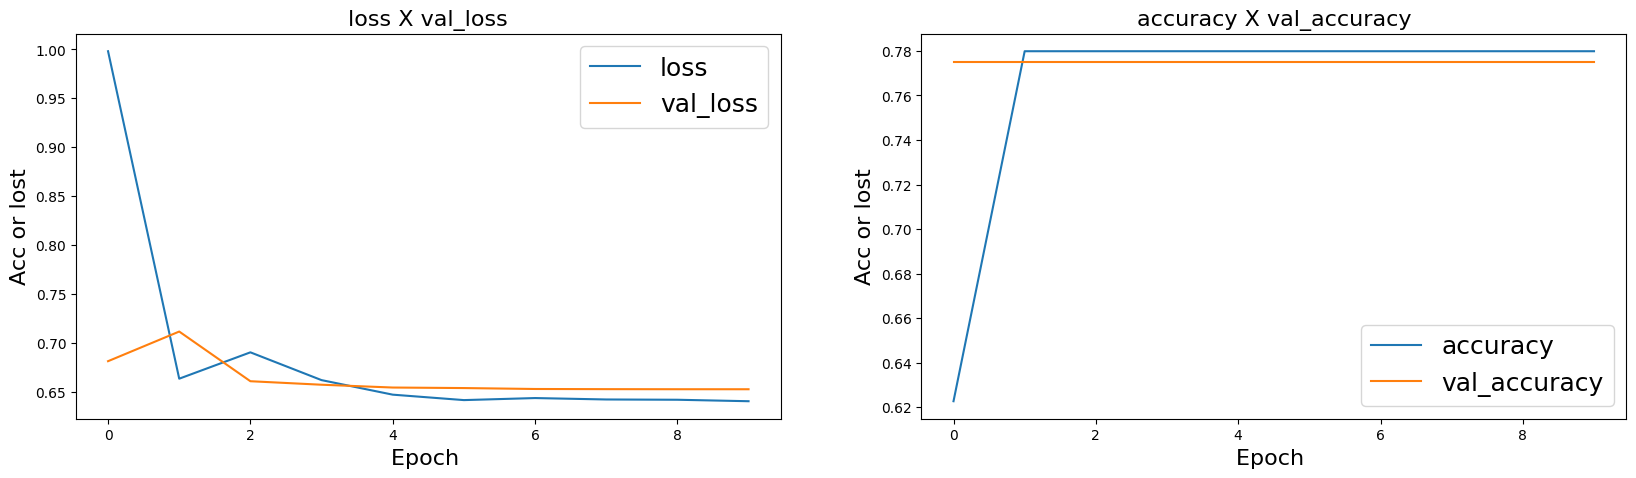

In [77]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lakukan prediksi menggunakan model
y_pred = np.argmax(model_lstm_2.predict(X_test), axis=-1)

4/4 [==============================] - 2s 35ms/step


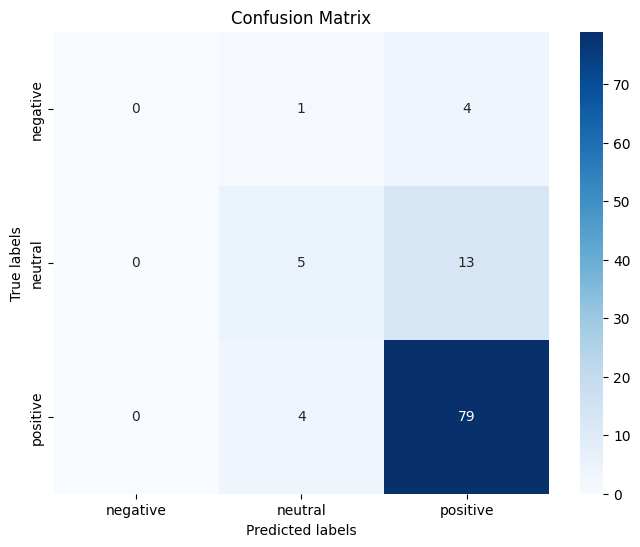

In [79]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_ohe, axis=1), y_pred)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung accuracy
accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), y_pred)

# Menghitung precision
precision = precision_score(np.argmax(y_test_ohe, axis=1), y_pred, average='weighted')

# Menghitung recall
recall = recall_score(np.argmax(y_test_ohe, axis=1), y_pred, average='weighted')

# Menghitung F1-score
f1 = f1_score(np.argmax(y_test_ohe, axis=1), y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7924528301886793
Precision: 0.7292649371069182
Recall: 0.7924528301886793
F1 Score: 0.7518032194431478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## viii. Model Saving

<!-- # import os

# # Define the directory path where you want to save the model
# model_dir = os.path.join(mainPath, 'model_lstm_2')
# model_dir2 = os.path.join(mainPath, 'model_lstm_3')

# localhost_save_option = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")
# model_lstm_2.save(model_dir, options=localhost_save_option)

# Save the entire model as a `.keras` zip archive.
# model_lstm_2.save(model_dir2, 'model_lstm_2.keras')

# # Menyimpan model ke dalam file dengan format .h5 menggunakan save_format='tf'
# model_lstm_2.save(mainPath + "/LSTM_Starbucks_Reviews", save_format='tf') -->

In [107]:
# Simpan model
model_lstm_2.save("model.keras", save_format="keras")

In [109]:
# from tensorflow.keras.models import load_model

# # Load the model
# loaded_model = load_model("model.keras")

# # Get the model summary
# loaded_model.summary()

In [112]:
X_test

669    purchas ham tomato chees sandwich starbuck hon...
294    never get drink wrong employe veri friendli pr...
553    best crew ever wade hampton greer south caroli...
619    balanc 2793 show card everi time look quit tim...
41     went starbuck kroger lower fayettevil wa thi o...
                             ...                        
359    starbuck airport qualiti coffe food select com...
348    went wa friend went got two drink ice blend ba...
588    order trent valencia orang drink ice gave two ...
693    go star buck everyday sometim two time day nev...
174    went new starbuck lakewood detroit ave peopl b...
Name: Review_clean, Length: 106, dtype: object

In [111]:
np.argmax(loaded_model.predict(X_test), axis=-1)

4/4 [==============================] - 5s 118ms/step


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

## ix. Model Inference

[Click Here...](https://colab.research.google.com/drive/1L_ajzoNoaevqMTi_GheoSWgu--rXeceG?usp=sharing)

## x. Conclusion

Based on the analysis:

1. **Data Perspective**: The Starbucks reviews dataset exhibits class imbalance, contains some instances with missing review text, and is relatively small for training a sentiment analysis model from scratch. Additionally, the dataset lacks explicit sentiment labels, requiring manipulation of the ratings to determine sentiment polarity.

2. **Feature Engineering**: Preprocessing steps such as lowercase conversion, punctuation removal, lemmatization, stemming, and stop word removal are crucial to eliminate noise from the corpus. Employing scikit-learn pipelines can streamline preprocessing tasks. Splitting data into three parts might not be ideal due to the imbalanced class distribution. TF-IDF is suitable for large corpora as it evaluates the importance of words in documents within the dataset.

3. **ANN Training**:
   - The notebook focuses on training a sequential ANN model, specifically LSTM, which is well-suited for text analysis due to its ability to maintain long-term dependencies.
   - Metrics selection considers the multi-class nature of the problem, leading to the utilization of Softmax activation for multi-class classification and categorical cross-entropy loss.
   - Several layers include dropout to mitigate overfitting, and callback functions like ModelCheckpoint, ReduceLROnPlateau, and EarlyStopping are employed for model optimization.

4. **Model Evaluation**:
   - The first model achieves an accuracy of 78%, with precision and recall values indicating difficulty in predicting labels other than positive due to the imbalance.
   - The second model (`model_lstm_2`) performs better, with an accuracy of around 81%, improved precision and recall scores, and a more balanced confusion matrix indicating better performance in predicting both positive and neutral labels.

5. **Model Selection**: Considering the summarized conclusions, the second model (`model_lstm_2`) emerges as the best-performing model and is hence chosen for further use.

This analysis highlights the importance of preprocessing, model selection, and evaluation in developing effective sentiment analysis models, especially when dealing with imbalanced datasets and multi-class classification problems.